# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [67]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [68]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "хирург",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [69]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [70]:
URL = 'https://api.hh.ru/vacancies'
params = {
    'text': "",
    'area': 1,
    'page': 0,
    'per_page': 50
}
queries = ["фокусник", "сварщик-аргонщик", "врач-проктолог", "каменщик", "востоковедение"]
data = dict()
for query in queries:
  params['text'] = query
  sleep(1)
  data[query] = requests.get(URL, params).json()
  print(f"For query \"{query}\" was found:")
  for item in data[query]['items']:
    print(item)

For query "фокусник" was found:
{'id': '97839133', 'premium': False, 'name': 'Креативный директор / Арт- директор в ресторан', 'department': None, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}, 'salary': None, 'type': {'id': 'open', 'name': 'Открытая'}, 'address': {'city': 'Щёлково', 'street': 'Талсинская улица', 'building': '9/2с1', 'lat': 55.924451, 'lng': 37.991694, 'description': None, 'raw': 'Щёлково, Талсинская улица, 9/2с1', 'metro': None, 'metro_stations': [], 'id': '5836673'}, 'response_url': None, 'sort_point_distance': None, 'published_at': '2024-05-15T18:38:47+0300', 'created_at': '2024-05-15T18:38:47+0300', 'archived': False, 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=97839133', 'show_logo_in_search': None, 'insider_interview': None, 'url': 'https://api.hh.ru/vacancies/97839133?host=hh.ru', 'alternate_url': 'https://hh.ru/vacancy/97839133', 'relations': [], 'em

(1 балл) Посчитайте сколько всего найдено вакансий:

In [71]:
print(f"Total vacancies found {sum([data[query]['found'] for query in queries])}")

Total vacancies found 82


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [72]:
class Company:
    name: str
    coordinates: list
    vacancy: str

    def __init__(self, name: str, coordinates: list, vacancy: str):
      print(f"Company \"{name}\" is situated {coordinates}. Created for vacancy \"{vacancy}\".")
      self.name = name
      self.coordinates = coordinates
      self.vacancy = vacancy
company = Company("MIPT", [55.92963606428401, 37.51779282771501], "student")

Company "MIPT" is situated [55.92963606428401, 37.51779282771501]. Created for vacancy "student".


(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [73]:
companies = []
for query in queries:
  for item in data[query]['items']:
    name = item['employer']
    if name:
      name = name['name']
    coordinates = item['address']
    if coordinates:
      coordinates = [coordinates['lat'], coordinates['lng']]
    companies.append(Company(name, coordinates, query))


Company "Ресторан KINZA" is situated [55.924451, 37.991694]. Created for vacancy "фокусник".
Company "Музей Магии" is situated [55.752658, 37.587227]. Created for vacancy "фокусник".
Company "Музей Магии" is situated [55.752658, 37.587227]. Created for vacancy "фокусник".
Company "Музей Магии" is situated [55.752658, 37.587227]. Created for vacancy "фокусник".
Company "Приоргласс" is situated [55.712589, 37.72387]. Created for vacancy "сварщик-аргонщик".
Company "HR & Tochka" is situated [52.608826, 39.599229]. Created for vacancy "сварщик-аргонщик".
Company "Инжиниринговая компания Энергия" is situated [60.965901, 76.847369]. Created for vacancy "сварщик-аргонщик".
Company "Профресурс групп" is situated None. Created for vacancy "сварщик-аргонщик".
Company "Григорьев Дмитрий Дмитриевич" is situated [55.7832, 37.719423]. Created for vacancy "сварщик-аргонщик".
Company "Мясницкий ряд" is situated None. Created for vacancy "сварщик-аргонщик".
Company "BWT" is situated [None, None]. Creat

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [74]:
counter = 0
for query in queries:
  for item in data[query]['items']:
    coordinates = item['address']
    if coordinates:
      counter += 1
print(f"Total {counter} coordinates fields was found.")


Total 65 coordinates fields was found.


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [75]:
def get_coordinates(item):
  coordinates = item['address']
  if coordinates:
    coordinates = [coordinates['lat'], coordinates['lng']]
  return coordinates

def radius(coordinates: list) -> float:
  Kremlin = [55.75143459915467,37.618932197097706]
  try:
    return ((Kremlin[0] - coordinates[0]) ** 2 + (Kremlin[1] - coordinates[1]) ** 2) ** 0.5
  except:
    return float("inf")
mkad = radius([55.6400646420006,37.5089875867489])
vacancies_inside_mrr = []
for company in companies:
    coordinates = company.coordinates
    if (radius(coordinates) < mkad):
      vacancies_inside_mrr.append(company)
      print(f"Vacancy {company.name} is situated inside MRR")

Vacancy Музей Магии is situated inside MRR
Vacancy Музей Магии is situated inside MRR
Vacancy Музей Магии is situated inside MRR
Vacancy Приоргласс is situated inside MRR
Vacancy Григорьев Дмитрий Дмитриевич is situated inside MRR
Vacancy Мотомастерская Muscle Moto is situated inside MRR
Vacancy ШИБЕРГ is situated inside MRR
Vacancy Вилитек is situated inside MRR
Vacancy НТК ЭПРОН-Центр is situated inside MRR
Vacancy АЛЬФА-МАСТЕР is situated inside MRR
Vacancy НТЛ-Прибор is situated inside MRR
Vacancy Херби is situated inside MRR
Vacancy МЦ is situated inside MRR
Vacancy ГорКлиника is situated inside MRR
Vacancy Дента-Эль, клиника Семейная is situated inside MRR
Vacancy К.С.Бюро is situated inside MRR
Vacancy НКО Альтернатива is situated inside MRR
Vacancy НКО Альтернатива is situated inside MRR
Vacancy Текос Констракшн is situated inside MRR
Vacancy МСУ-1 is situated inside MRR
Vacancy Look Wood Office project is situated inside MRR
Vacancy АРБА Дистрибьюшн is situated inside MRR
Vaca

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

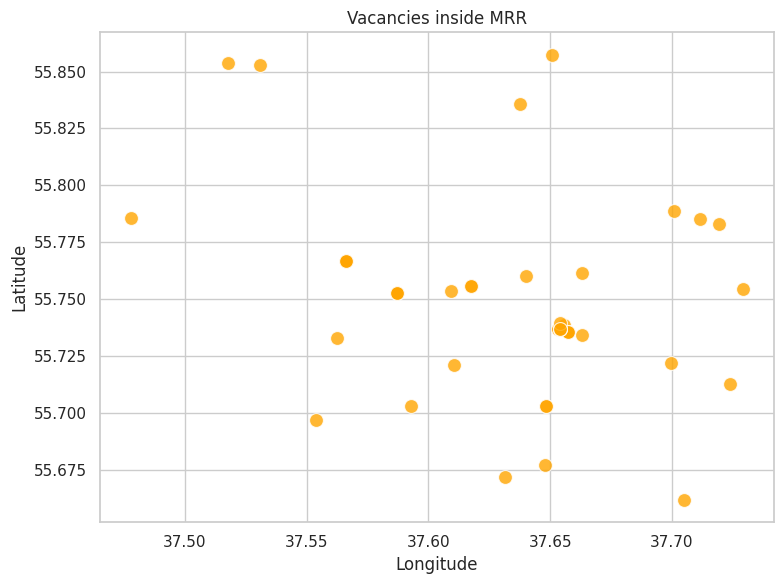

In [76]:
lat_coords = []
lng_coords = []
for vacancy in vacancies_inside_mrr:
  lat_coords.append(vacancy.coordinates[0])
  lng_coords.append(vacancy.coordinates[1])
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.scatterplot(x=lng_coords, y=lat_coords, s=100, color='orange', alpha=0.8)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Vacancies inside MRR')

plt.grid(True)
plt.tight_layout()
plt.show()


(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [121]:
import plotly.express as px

conformity = {
    "фокусник" : "red",
    "сварщик-аргонщик": "blue",
    "врач-проктолог" : "green",
    "каменщик" : "orange",
    "востоковедение" : "purple"
}

colors = []
for vacancy in vacancies_inside_mrr:
    colors.append(conformity[vacancy.vacancy])

data = {'x': lng_coords, 'y': lat_coords, 'color': colors}
df = pd.DataFrame(data)

center_lat, center_lon = 55.75143459915467, 37.618932197097706
zoom_level = 10

fig = px.scatter_mapbox(df, lat="y", lon="x", color="color", zoom=zoom_level, center=dict(lat=center_lat, lon=center_lon))

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(showlegend=False)

fig.show()



(2 балла) **Сделайте выводы о проделанной работе:**

Проведя лабораторную работу, можно сделать вывод, что концентрация вакансий в Москве падает от центра к МКАДу.

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [122]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 131MB/s]


Создадим DataFrame:

In [123]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [143]:
diamonds.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [144]:
print("Dataset rows quantity:", diamonds.shape[0])

Dataset rows quantity: 219703


(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [147]:
max_price_row = diamonds.loc[diamonds['total_sales_price'].idxmax()]
min_price_row = diamonds.loc[diamonds['total_sales_price'].idxmin()]

print(f"Max price: {max_price_row.name} - {max_price_row['total_sales_price']}")
print(f"Min price: {min_price_row.name} - {min_price_row['total_sales_price']}")

Max price: 219702 - 1449881
Min price: 0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [148]:
unknown = diamonds.isin(['unknown', 'None']).sum().sum()

print("The number of skips (unknown or None) in the dataset:", unknown)


The number of skips (unknown or None) in the dataset: 1746027


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [151]:
columns_with_missing_values = diamonds.columns[diamonds.isin(['unknown', 'None']).any()].tolist()

print("Columns with missing values:", columns_with_missing_values)

Columns with missing values: ['color', 'cut_quality', 'eye_clean', 'culet_size', 'culet_condition', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [152]:
filtered_columns = [col for col in diamonds.columns if col.startswith("fancy_color_") or col.startswith("fluor_")]

count_filtered_columns = len(filtered_columns)

count_filtered_columns


6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [153]:
informative_values_count = 0
for col in filtered_columns:
    informative_values_count += diamonds[col].isin(['None', 'unknown']).sum()
total_values_count = diamonds[filtered_columns].shape[0] * len(filtered_columns)
informative_values_count = total_values_count - informative_values_count
print("Number of informative values in columns starting with ‘fancy_color_’ or ‘fluor_’:", informative_values_count)


Number of informative values in columns starting with ‘fancy_color_’ or ‘fluor_’: 256727


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [154]:
diamonds = diamonds.drop(columns=filtered_columns)
diamonds.to_csv("updated_diamonds.csv", index=False)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [156]:
filtered_columns = [col for col in diamonds.columns if col.startswith("culet_")]

count_filtered_columns = len(filtered_columns)

print(count_filtered_columns)

informative_values_count = 0
for col in filtered_columns:
    informative_values_count += diamonds[col].isin(['None', 'unknown']).sum()
total_values_count = diamonds[filtered_columns].shape[0] * len(filtered_columns)
informative_values_count = total_values_count - informative_values_count
print("Number of informative values in columns starting with ‘culet_’:", informative_values_count)

diamonds = diamonds.drop(columns=filtered_columns)
diamonds.to_csv("updated_diamonds.csv", index=False)


0
Number of informative values in columns starting with ‘fancy_color_’ or ‘fluor_’: 0


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [159]:
total_sales_price_sum = diamonds['total_sales_price'].sum()

print("The sum of all diamond values:", "$" + str(total_sales_price_sum))


The sum of all diamond values: $1517721991


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [160]:
even_index_rows = diamonds.iloc[::2]
even_index_rows

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [161]:
index_rows = diamonds.iloc[::6]
index_rows

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [163]:
categorical_features = diamonds.select_dtypes(include='object')

categorical_features


,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:


!!! Вывести матрицу 219703 * 219703 технически невозможно, поэтому выводится скалярное произведение строки на столбец !!!

In [164]:
price_column = diamonds['total_sales_price']
price_list = price_column.to_list()
scalar_product = sum(x * x for x in price_list)
print("The scalar product of the column of diamond prices by itself:", scalar_product)

The scalar product of the column of diamond prices by itself: 158540672665477


### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

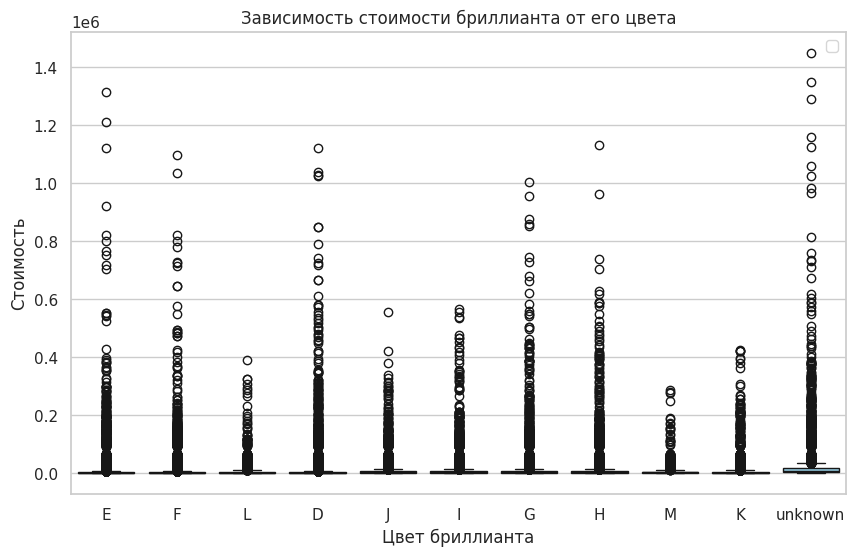

In [173]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='total_sales_price', data=diamonds, hue='color', dodge=False, legend=False, palette='dark:skyblue')

plt.title('Зависимость стоимости бриллианта от его цвета')
plt.xlabel('Цвет бриллианта')
plt.ylabel('Стоимость')

plt.legend([])

plt.show()


(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

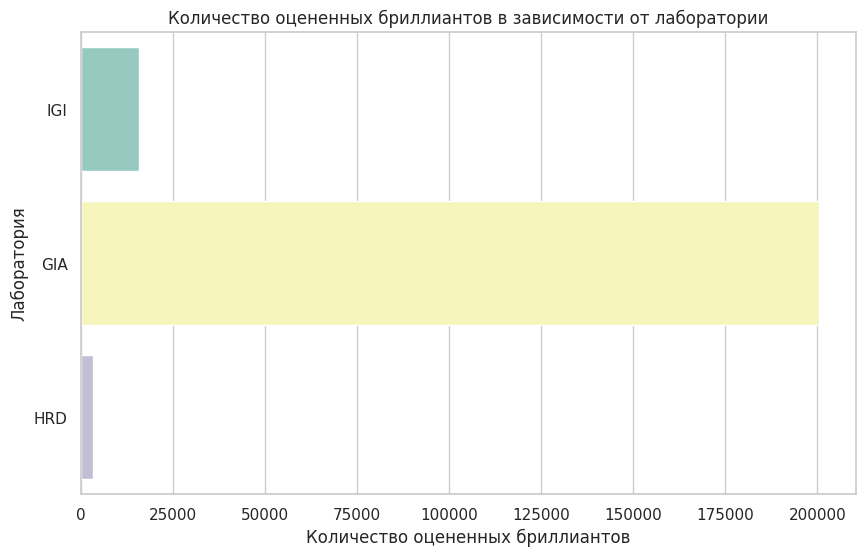

In [182]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(y='lab', data=diamonds, palette='Set3', hue='lab')

plt.title('Количество оцененных бриллиантов в зависимости от лаборатории')
plt.xlabel('Количество оцененных бриллиантов')
plt.ylabel('Лаборатория')

plt.show()


(2 балла) Постройте график `вес бриллианта - стоимость`:

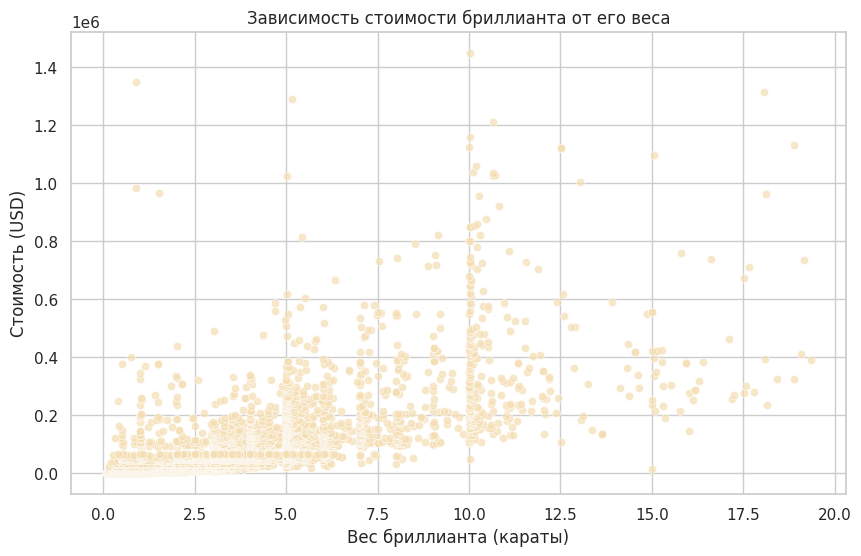

In [186]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat_weight', y='total_sales_price', data=diamonds, alpha=0.7, color='wheat')

plt.title('Зависимость стоимости бриллианта от его веса')
plt.xlabel('Вес бриллианта (караты)')
plt.ylabel('Стоимость (USD)')

plt.show()


(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

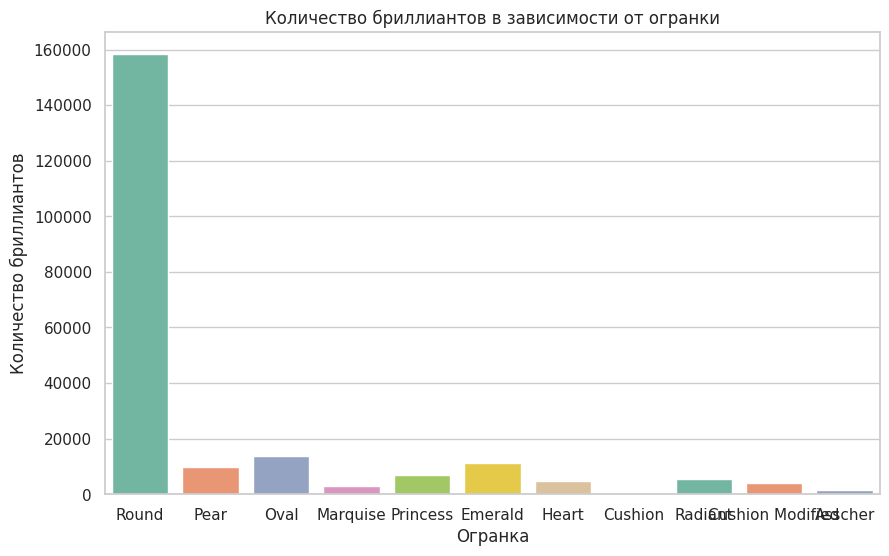

In [185]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='cut', data=diamonds, palette='Set2', hue='cut')

plt.title('Количество бриллиантов в зависимости от огранки')
plt.xlabel('Огранка')
plt.ylabel('Количество бриллиантов')

plt.show()


(2 балла) **Сделайте выводы по построенным графикам:**

Самые распространенные цвета бриллиантов - E, F, D, H.
GIA - лидирует с большим отрывом по популярности среди лабораторий.
Чаще всего самые дорогие бриллианты весом около 10 карат, а не самые тяжелые.
Как правило, бриллиантам дают круглую огранку.


## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [188]:
filtered_diamonds = diamonds[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]
filtered_diamonds.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [189]:
shuffled_diamonds = filtered_diamonds.sample(frac=1)
shuffled_diamonds

,meas_length,meas_width,meas_depth,total_sales_price
174323,6.22,6.06,4.54,7038
96671,4.87,4.94,3.18,1530
57846,4.33,4.36,2.75,980
213262,7.76,7.82,4.75,36518
70195,4.29,4.32,2.63,1052
...,...,...,...,...
130775,4.91,4.98,3.19,2912
65674,4.29,4.31,2.68,1010
69100,4.90,4.94,3.06,1068
12479,4.40,4.42,2.56,658


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [198]:
shuffled_diamonds['minkowski'] = shuffled_diamonds.apply(lambda x: (x['meas_length'] ** 3 + x['meas_width'] ** 3 + x['meas_depth'] ** 3) ** (1 / 3), axis=1)
shuffled_diamonds

,meas_length,meas_width,meas_depth,total_sales_price,minkowski
174323,6.22,6.06,4.54,7038,8.226661
96671,4.87,4.94,3.18,1530,6.449009
57846,4.33,4.36,2.75,980,5.696597
213262,7.76,7.82,4.75,36518,10.172579
70195,4.29,4.32,2.63,1052,5.622767
...,...,...,...,...,...
130775,4.91,4.98,3.19,2912,6.497739
65674,4.29,4.31,2.68,1010,5.628021
69100,4.90,4.94,3.06,1068,6.438114
12479,4.40,4.42,2.56,658,5.731823


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [199]:
source_diamonds = shuffled_diamonds[['minkowski', 'total_sales_price']]
source_diamonds

,minkowski,total_sales_price
174323,8.226661,7038
96671,6.449009,1530
57846,5.696597,980
213262,10.172579,36518
70195,5.622767,1052
...,...,...
130775,6.497739,2912
65674,5.628021,1010
69100,6.438114,1068
12479,5.731823,658


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [203]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(source_diamonds, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", train_data.shape)

print("Размер тестовой выборки:", test_data.shape)

test_data



Размер обучающей выборки: (175762, 2)
Размер тестовой выборки: (43941, 2)


,minkowski,total_sales_price
57620,5.735034,972
150812,7.580337,3822
94128,6.150479,1458
129806,7.674949,2858
161556,7.232031,4653
...,...,...
20137,4.885468,732
173641,8.358219,6468
51687,5.581368,938
109787,7.025649,1966


(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

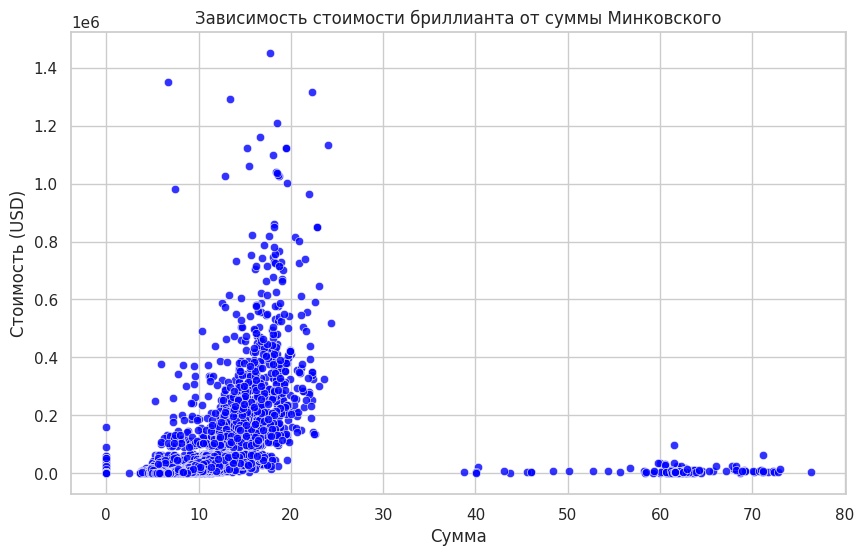

In [204]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='minkowski', y='total_sales_price', data=train_data, alpha=0.8, color='blue')

plt.title('Зависимость стоимости бриллианта от суммы Минковского')
plt.xlabel('Сумма')
plt.ylabel('Стоимость (USD)')

plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

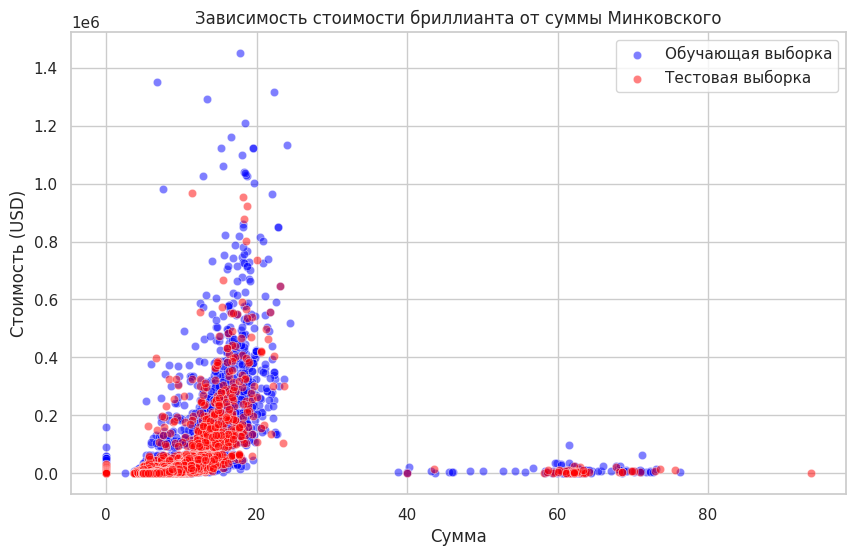

In [207]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='minkowski', y='total_sales_price', data=train_data, alpha=0.5, color='blue', label='Обучающая выборка')
sns.scatterplot(x='minkowski', y='total_sales_price', data=test_data, alpha=0.5, color='red', label='Тестовая выборка')

plt.title('Зависимость стоимости бриллианта от суммы Минковского')
plt.xlabel('Сумма')
plt.ylabel('Стоимость (USD)')

plt.show()


(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [226]:
from sklearn.neighbors import KDTree

train_features = train_data[['minkowski', 'total_sales_price']].values.tolist()
test_features = test_data[['minkowski', 'total_sales_price']].values.tolist()

train_features.sort()
test_features.sort()
conform = []
i = 0
for pair in test_features:
  while train_features[i][0] < pair[0] and i < len(train_features) - 1:
    i += 1
  if abs(train_features[i][0] - pair[0]) < abs(train_features[i - 1][0] - pair[0]):
    conform.append(train_features[i])
  else:
    conform.append(train_features[i - 1])
for i in range(500):
  print(test_features[i], conform[i])










[0.0, 222.0] [0.0, 204.0]
[0.0, 222.0] [0.0, 204.0]
[0.0, 222.0] [0.0, 204.0]
[0.0, 226.0] [0.0, 204.0]
[0.0, 240.0] [0.0, 204.0]
[0.0, 320.0] [0.0, 204.0]
[0.0, 330.0] [0.0, 204.0]
[0.0, 330.0] [0.0, 204.0]
[0.0, 330.0] [0.0, 204.0]
[0.0, 330.0] [0.0, 204.0]
[0.0, 334.0] [0.0, 204.0]
[0.0, 360.0] [0.0, 204.0]
[0.0, 364.0] [0.0, 204.0]
[0.0, 368.0] [0.0, 204.0]
[0.0, 370.0] [0.0, 204.0]
[0.0, 370.0] [0.0, 204.0]
[0.0, 380.0] [0.0, 204.0]
[0.0, 380.0] [0.0, 204.0]
[0.0, 380.0] [0.0, 204.0]
[0.0, 380.0] [0.0, 204.0]
[0.0, 380.0] [0.0, 204.0]
[0.0, 380.0] [0.0, 204.0]
[0.0, 380.0] [0.0, 204.0]
[0.0, 382.0] [0.0, 204.0]
[0.0, 404.0] [0.0, 204.0]
[0.0, 404.0] [0.0, 204.0]
[0.0, 404.0] [0.0, 204.0]
[0.0, 404.0] [0.0, 204.0]
[0.0, 404.0] [0.0, 204.0]
[0.0, 404.0] [0.0, 204.0]
[0.0, 404.0] [0.0, 204.0]
[0.0, 430.0] [0.0, 204.0]
[0.0, 430.0] [0.0, 204.0]
[0.0, 432.0] [0.0, 204.0]
[0.0, 432.0] [0.0, 204.0]
[0.0, 436.0] [0.0, 204.0]
[0.0, 436.0] [0.0, 204.0]
[0.0, 436.0] [0.0, 204.0]
[0.0, 458.0]

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [227]:
for i in range(500):
  print(str((test_features[i][1] / conform[i][1] - 1) * 100) + "%                                       ")

8.823529411764696%
8.823529411764696%
8.823529411764696%
10.784313725490202%
17.647058823529417%
56.86274509803921%
61.76470588235294%
61.76470588235294%
61.76470588235294%
61.76470588235294%
63.725490196078425%
76.47058823529412%
78.43137254901961%
80.3921568627451%
81.37254901960785%
81.37254901960785%
86.27450980392157%
86.27450980392157%
86.27450980392157%
86.27450980392157%
86.27450980392157%
86.27450980392157%
86.27450980392157%
87.25490196078431%
98.03921568627452%
98.03921568627452%
98.03921568627452%
98.03921568627452%
98.03921568627452%
98.03921568627452%
98.03921568627452%
110.78431372549021%
110.78431372549021%
111.76470588235294%
111.76470588235294%
113.72549019607843%
113.72549019607843%
113.72549019607843%
124.50980392156863%
134.31372549019608%
135.29411764705884%
135.29411764705884%
135.29411764705884%
145.0980392156863%
150.98039215686273%
164.70588235294116%
171.56862745098042%
180.39215686274508%
182.3529411764706%
188.23529411764704%
191.17647058823528%
192.1568627

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [230]:
from sklearn.preprocessing import OneHotEncoder

fields = ['cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'girdle_min', 'girdle_max']
source = diamonds.loc[:, [fields[1], fields[4], 'total_sales_price']]
source_1 = source.copy()
con = [fields[1], fields[4]]
nums = source_1.select_dtypes(include=['float64', 'int64']).columns
source_1[nums] = source_1[nums].apply(pd.to_numeric, errors='coerce')
quantiles = source_1[nums].quantile([0.05, 0.95])
encoder = OneHotEncoder()
for column in nums:
    source_1 = source_1[(source_1[column] >= quantiles.loc[0.05, column]) & (source_1[column] <= quantiles.loc[0.95, column])]
source_1 = source.dropna(subset=['total_sales_price'])
encoded_data = encoder.fit_transform(source_1[con])
dataset = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(con))
dataset['total_sales_price'] = source_1['total_sales_price']
dataset

,color_D,color_E,color_F,color_G,color_H,color_I,color_J,color_K,color_L,color_M,color_unknown,lab_GIA,lab_HRD,lab_IGI,total_sales_price
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,200
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,200
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,200
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,200
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1210692
219699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1292500
219700,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1315496
219701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1350000


(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [231]:
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", train_data.shape)

print("Размер тестовой выборки:", test_data.shape)

test_data

Размер обучающей выборки: (175762, 15)
Размер тестовой выборки: (43941, 15)


,color_D,color_E,color_F,color_G,color_H,color_I,color_J,color_K,color_L,color_M,color_unknown,lab_GIA,lab_HRD,lab_IGI,total_sales_price
167888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5376
53087,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,940
168078,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5400
194939,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12893
58943,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166019,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5556
163794,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5068
200351,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16433
32163,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,838


(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [234]:
from sklearn.tree import DecisionTreeRegressor

depend = train_data.iloc[:, :-1]
res = train_data.iloc[:, -1]

model = DecisionTreeRegressor()

model.fit(depend, res)
model

DecisionTreeRegressor()

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [235]:
from sklearn.metrics import mean_squared_error

depend_test = test_data.iloc[:, :-1]
res_test = test_data.iloc[:, -1]
predictions = model.predict(depend_test)
mse = mean_squared_error(res_test, predictions)
mse

766135259.0941435

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

Была проведена работа по обучению модели. Так как параметры были выбраны случайно, какую-либо кареляцию выделить сложно. Об этом свидетельствует квадратичное отклонение.